<a href="https://colab.research.google.com/github/aditya2706-dot/Nifty-500-Live-Sentiment-Analysis/blob/main/Train_Test_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

def generate_student_scores(n=1000, random_state=None, save_path=None):
    rng = np.random.default_rng(random_state)
    hours = rng.uniform(0.5, 9.5, size=n)
    hours = np.round(hours, 1)
    noise = rng.normal(loc=0.0, scale=8.0, size=n)
    scores = 10 * hours + noise
    scores = np.clip(scores, 0, 100)
    scores = np.round(scores, 0).astype(int)
    df = pd.DataFrame({"Hours": hours, "Scores": scores})
    if save_path:
        df.to_csv(save_path, index=False)
        print(f"✅ Dataset saved to {save_path}")
    return df

df = generate_student_scores(n=50, save_path="student_scores.csv")
print(df.head())

✅ Dataset saved to student_scores.csv
   Hours  Scores
0    7.6      78
1    8.5      79
2    1.7      25
3    6.4      73
4    7.5      91


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv("student_scores.csv")
df.head(10)


,Hours,Scores
0,7.6,78
1,8.5,79
2,1.7,25
3,6.4,73
4,7.5,91
5,5.8,66
6,6.4,57
7,4.7,51
8,9.4,87
9,6.2,62


In [4]:
df.shape

(50, 2)

In [5]:
stats = {}
for col in ["Hours", "Scores"]:
    stats[col] = {
        "Max": df[col].max(),
        "Min": df[col].min(),
        "Mean": df[col].mean(),
        "Median": df[col].median()
    }

pd.DataFrame(stats)


,Hours,Scores
Max,9.400,91.00
Min,0.700,4.00
Mean,5.334,53.58
Median,5.500,53.00


In [6]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

print("Training set rows:", len(train))
print("Testing set rows:", len(test))

Training set rows: 35
Testing set rows: 15


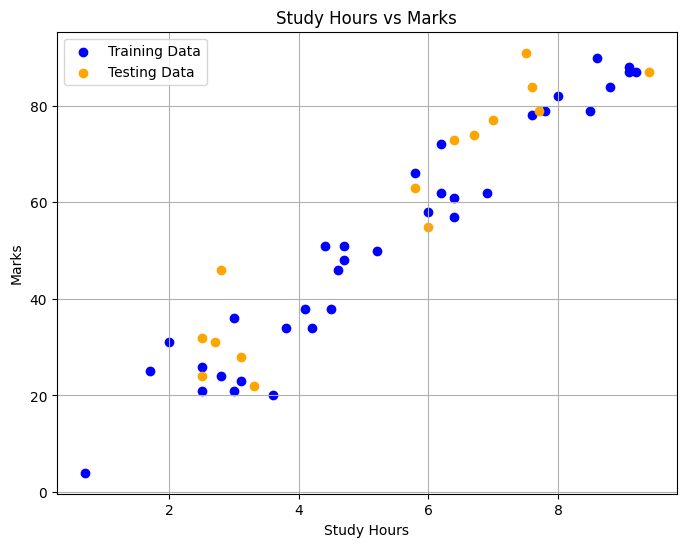

In [7]:
plt.figure(figsize=(8,6))

# Training data points
plt.scatter(train["Hours"], train["Scores"], color="blue", label="Training Data")

# Testing data points
plt.scatter(test["Hours"], test["Scores"], color="orange", label="Testing Data")

# Labels and title
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks")
plt.legend()
plt.grid(True)
plt.show()
